# Objectives of Research

In [1]:
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import matplotlib.pyplot as plt
import datetime as dt # date time
import seaborn as snsA
import seaborn as sns
import warnings#
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_theme()
!pip install vaderSentiment
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import *
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download VADER lexicon 
nltk.download('vader_lexicon')
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas.plotting import register_matplotlib_converters
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/debasmitamohanty/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2024-06-10 16:53:15.005819: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')

# 1. Estimating Parameters for Stock Market using ARIMA

In [3]:
# Filter stock data for AAPL, NFLX, and AMZN
filtered_stock_yfinance_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]



# Filter tweet data for AAPL, NFLX, and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Convert 'Date' columns to datetime format
filtered_stock_yfinance_data['Date'] = pd.to_datetime(filtered_stock_yfinance_data['Date'])
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.date

# Convert the 'Date' column in filtered_stock_tweets to datetime
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])


In [4]:
# Merge the datasets on the 'Date' column
merged_data = pd.merge(filtered_stock_yfinance_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])


In [5]:


# Checking for missing values in each column
missing_values = merged_data.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Stock Name      0
Tweet           0
Company Name    0
dtype: int64


In [6]:
# Split data into train and test sets
train_size = int(len(merged_data) * 0.8)
train, test = merged_data['Close'][:train_size], merged_data['Close'][train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 0))
model_fit = model.fit()

# Forecast
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)


In [7]:
# Predict on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Evaluate ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test, predictions))
arima_mae = mean_absolute_error(test, predictions)
arima_mape = np.mean(np.abs((test - predictions) / test)) * 100
arima_r2 = r2_score(test, predictions)

print("ARIMA Model:")
print("RMSE:", arima_rmse)
print("MAE:", arima_mae)
print("MAPE:", arima_mape)
print("R-squared:", arima_r2)

ARIMA Model:
RMSE: 209.10558638109856
MAE: 146.83582535724676
MAPE: 37.47735500719169
R-squared: -0.943262405203227


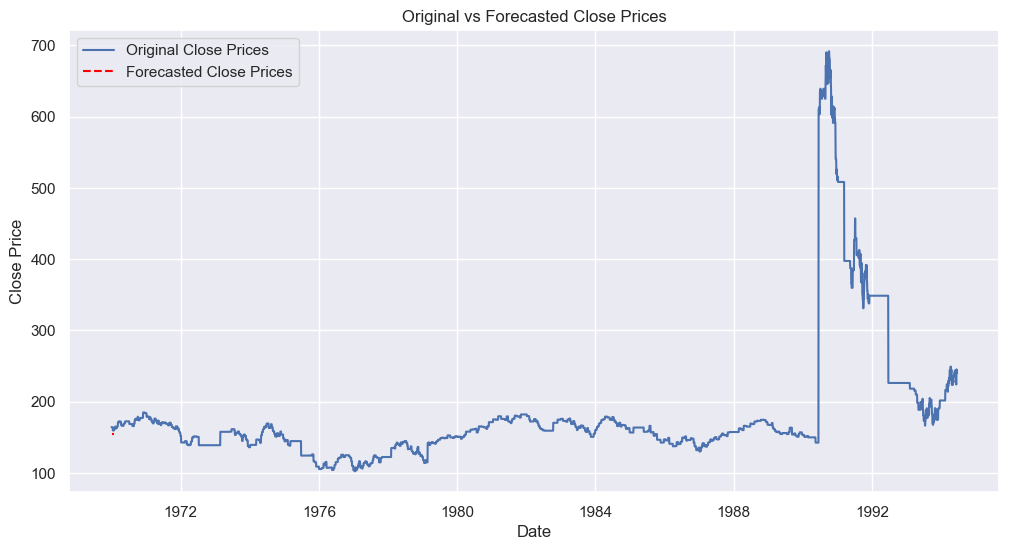

In [8]:
# Plotting original and forecasted values
last_date = merged_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Original Close Prices')
plt.plot(forecast_dates, forecast, color='red', linestyle='--', label='Forecasted Close Prices')
plt.title('Original vs Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# 2.Perform Sentiment Analysis

In [9]:
# Filter stock data for AAPL, NFLX, and AMZN
filtered_stock_yfinance_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Filte

# Filter tweet data for AAPL, NFLX, and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Convert 'Date' columns to datetime format
filtered_stock_yfinance_data['Date'] = pd.to_datetime(filtered_stock_yfinance_data['Date'])
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.date

# Convert the 'Date' column in filtered_stock_tweets to datetime
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])



In [10]:
# Merge the datasets on the 'Date' column
merged_data = pd.merge(filtered_stock_yfinance_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])


In [11]:
import pandas as pd

# Assuming filtered_data is already defined
# Checking for missing values in each column
missing_values = merged_data.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Stock Name      0
Tweet           0
Company Name    0
dtype: int64


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
merged_data['Sentiment'] = merged_data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Aggregate sentiment scores by date
daily_sentiment = merged_data.groupby('Date')['Sentiment'].mean().reset_index()

# Merge with stock market data
merged_data = pd.merge(merged_data, daily_sentiment, on='Date', how='left').fillna(0)


In [13]:
merged_data.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1    2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
2    2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
3    2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
4    2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
...         ...         ...         ...         ...         ...         ...   
8930 2022-09-28  229.690002  246.649994  227.380005  245.199997  245.199997   
8931 2022-09-28  229.690002  246.649994  227.380005  245.199997  245.199997   
8932 2022-09-29  241.610001  246.979996  235.679993  239.710007  239.710007   
8933 2022-09-29  241.610001  246.979996  235.679993  239.710007  239.710007   
8934 2022-09-29  241.610001  246.979996  235.679993  239.710007  239.710007   

        Volume Stock 

In [14]:

# Drop duplicate columns
merged_data = merged_data.loc[:,~merged_data.columns.duplicated()]

# Alternatively, if you want to keep only one of the duplicate columns (e.g., 'Sentiment_y'):
merged_data = merged_data.drop(columns=['Sentiment_x'])

# Print the head of the cleaned DataFrame to verify
print(merged_data.head())


        Date        Open        High         Low       Close   Adj Close  \
0 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
2 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
3 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
4 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

     Volume Stock Name                                              Tweet  \
0  56848000       AMZN  My top 10 holdings make up 66% of my portfolio...   
1  56848000       AMZN  Amazon $AMZN has 4X the market cap of Alibaba ...   
2  56848000       AMZN  Returns over the last 10 Years:\n\nBitcoin $BT...   
3  56848000       AMZN  Great snapshot of what it looks like when an i...   
4  56848000       AMZN  Shopify is now 9% of US e-commerce. It really ...   

       Company Name  Sentiment_y  
0  Amazon.com, Inc.     0.188506  
1  Amazon.

# 3.Combining ARIMA and VADER for Multimodal Analysis

In [15]:
# Define the number of forecast steps
forecast_steps = 30  # for example, forecasting the next 30 days

# Split data into train and test sets
train_size = int(len(merged_data) * 0.8)
train, test = merged_data['Close'][:train_size], merged_data['Close'][train_size:]
train_exog, test_exog = merged_data['Sentiment_y'][:train_size], merged_data['Sentiment_y'][train_size:]

# Fit ARIMA model
model = ARIMA(train, exog=train_exog, order=(1, 1, 0))
model_fit = model.fit()

# Forecast
forecast_exog = test_exog[:forecast_steps]
forecast = model_fit.forecast(steps=forecast_steps, exog=forecast_exog)


In [16]:
# Predict on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, exog=test_exog)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
r2 = r2_score(test, predictions)

print("ARIMA with Sentiment Model:")
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)

ARIMA with Sentiment Model:
RMSE: 208.89228373464172
MAE: 146.63404917377744
MAPE: 37.412721608821606
R-squared: -0.9392998941139059


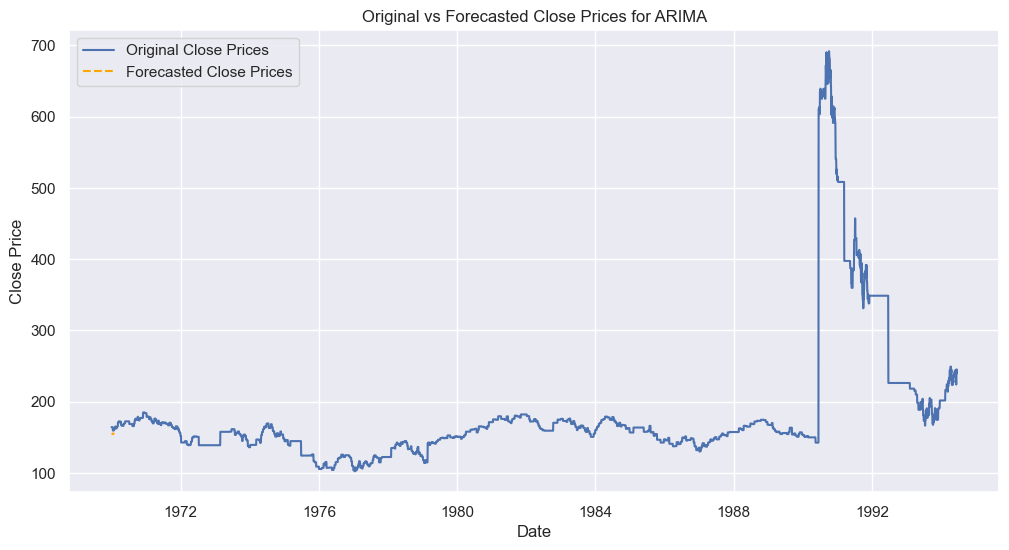

In [17]:
# Plot the original data and the forecasted values with adjusted dates
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Original Close Prices')
plt.plot(forecast_dates, forecast, color='orange', linestyle='--', label='Forecasted Close Prices')  # Adjust color to orange
plt.title('Original vs Forecasted Close Prices for ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# 4. Comparing ARIMA and LSTM

In [18]:
# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_data[['Close']].values)

# Create a function to prepare the data for LSTM
def create_dataset(data, n_past=60):
    X, y = [], []
    for i in range(n_past, len(data)):
        X.append(data[i - n_past:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_past = 60
X, y = create_dataset(scaled_data, n_past)

In [19]:
# Split into train and test sets
train_size = int(len(X) * 0.8)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Define and fit the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, batch_size=1, epochs=1)

7100/7100 ━━━━━━━━━━━━━━━━━━━━ 117s 16ms/step - loss: 6.7770e-05


In [20]:
# Predicting and inverse transforming the predictions
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [21]:
# Evaluate LSTM model
lstm_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_y.reshape(-1, 1)), train_predictions))
lstm_mae = mean_absolute_error(scaler.inverse_transform(train_y.reshape(-1, 1)), train_predictions)
lstm_mape = np.mean(np.abs((scaler.inverse_transform(train_y.reshape(-1, 1)) - train_predictions) / scaler.inverse_transform(train_y.reshape(-1, 1)))) * 100
lstm_r2 = r2_score(scaler.inverse_transform(train_y.reshape(-1, 1)), train_predictions)


In [22]:
print("LSTM Model:")
print("RMSE:", lstm_rmse)
print("MAE:", lstm_mae)
print("MAPE:", lstm_mape)
print("R-squared:", lstm_r2)

LSTM Model:
RMSE: 3.4256219250050153
MAE: 3.2413387525694617
MAPE: 2.132793768759487
R-squared: 0.9683197682311692


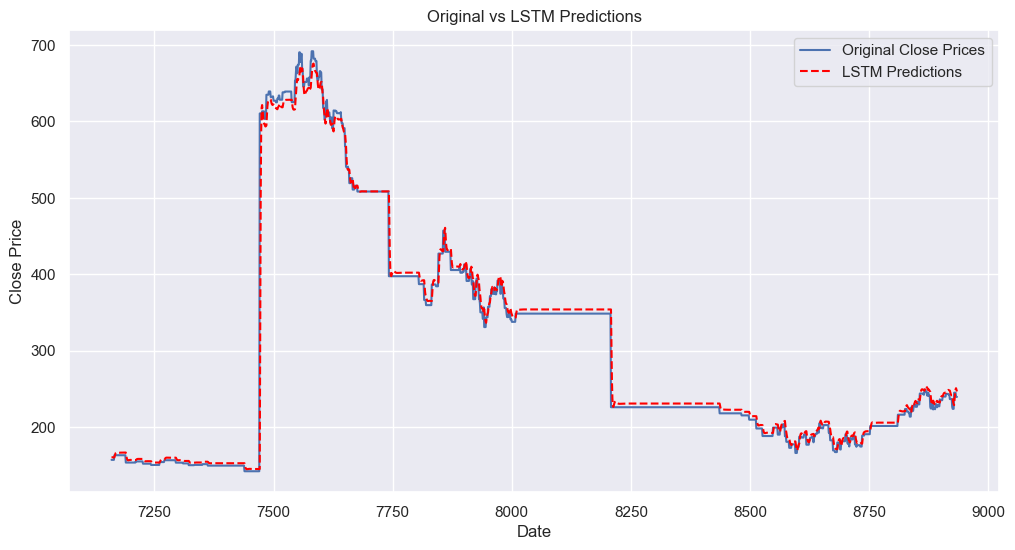

In [23]:
# Plotting LSTM results
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index[-len(test_y):], scaler.inverse_transform(test_y.reshape(-1, 1)), label='Original Close Prices')
plt.plot(merged_data.index[-len(test_y):], test_predictions, color='red', linestyle='--', label='LSTM Predictions')
plt.title('Original vs LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()